<H3>    First Name: Balkattu Shreekantha Uttam
<H3>    Last Name: Kannantha
<H3>    USC ID: 9202391620
<H3>    Github UserName: Uttamkannantha

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.special import softmax
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc, roc_curve, confusion_matrix
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import StratifiedKFold

<h3>1. Supervised, Semi-Supervised, and Unsupervised Learning


<h4>(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
dfOriginal = pd.read_csv('../data/wdbc.data', header = None)

In [3]:
dfOriginal

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
features = ["radius"," texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry",
"fractal dimension"]
newColumns = ['ID num', 'Diagnosis']

columns = 3

for i in range(1, int(columns)+ 1):
    for j in features:
        columns = [j+ str(i)]
        newColumns.extend([j+ str(i)])
        

dfOriginal.columns = newColumns

dfOriginal

,ID num,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
dfOriginal['Diagnosis'] = dfOriginal['Diagnosis'].map({'M':1, 'B':0})

#normalize the data except the ID num and Diagnosis columns
# dfNormalized = dfOriginal.iloc[:,2:].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# dfNormalized

dfOriginal


,ID num,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#count number of 1 and 0 in the Diagnosis column
dfOriginal['Diagnosis'].value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

<h4>(b) Monte-Carlo Simulation : Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F 1 -score, and AUC) that you obtain from each algorithm

<h4>i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Train confusion matrix when i = 30:
[[286   0]
 [  4 166]]


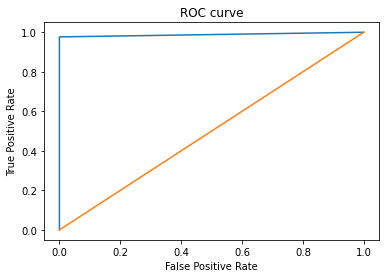

Test confusion matrix when i = 30:
[[64  7]
 [ 3 39]]


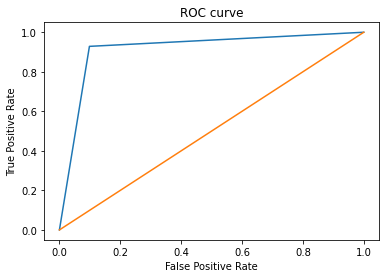

In [7]:
trainAccuracy = []
trainPrecision = []
trainRecall = []
trainFscore = []
trainAuc= []

testAccuracy = []
testPrecision = []
testRecall = []
testFscore = []
testAuc= []


for i in range(1,31):
    normalize = Normalizer()
    #create a dataframe for 0 and 1
    df0 = dfOriginal[dfOriginal['Diagnosis'] == 0]
    df1 = dfOriginal[dfOriginal['Diagnosis'] == 1]

    #create a train dataframe with random 80% of 0 and 1 and reamining 20% as test dataframe
    df0_train = df0.sample(frac=0.8, random_state=i)
    df1_train = df1.sample(frac=0.8, random_state=i)
    df_train = pd.concat([df0_train, df1_train], axis=0)

    df0_test = df0.drop(df0_train.index)
    df1_test = df1.drop(df1_train.index)
    df_test = pd.concat([df0_test, df1_test], axis=0)

    #xTain and yTrain
    xTrain = df_train.iloc[:,2:].reset_index()
    yTrain = df_train.iloc[:,1].reset_index()
    
    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)
    
    #normalize 
    val_train = normalize.fit_transform(xTrain)
    xTrainNormalized = pd.DataFrame(val_train)
    xTrainNormalized.columns = xTrain.columns

    #xTest and yTest
    xTest = df_test.iloc[:,2:].reset_index()
    yTest = df_test.iloc[:,1].reset_index()
    
    xTest.drop('index', inplace=True, axis=1)
    yTest.drop('index', inplace=True, axis=1)
    
    #normalize
    val_test = normalize.transform(xTest)
    xTestNormalized = pd.DataFrame(val_test)
    xTestNormalized.columns = xTest.columns
    
    #Fit the model train
    svmL1 = LinearSVC(penalty='l1', dual=False)
    svmL1 = GridSearchCV(estimator = svmL1, param_grid={'C': np.logspace(-6,12,24), 'tol':[0.0001,0.00001,0.000001] } , cv = 5)
    svmL1.fit(xTrainNormalized, yTrain['Diagnosis'])
    
    #Predict and calculate metrics train
    yPred = svmL1.predict(xTrainNormalized)
    trainPrecision.append(precision_score(yTrain, yPred))
    trainRecall.append(recall_score(yTrain, yPred))
    trainAccuracy.append(accuracy_score(yTrain, yPred)) 
    trainFscore.append(f1_score(yTrain, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTrain,yPred)
    trainAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Train confusion matrix when i = 30:")
        print(confusion_matrix(yTrain, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    
     #Fit the model test
#     svmL1 = LinearSVC(penalty='l1', dual=False)
#     svmL1 = GridSearchCV(estimator = svmL1, param_grid={'C': np.logspace(-6,12,24), 'tol':[0.0001,0.00001,0.000001] } , cv = 5)
#     svmL1.fit(xTestNormalized, yTest['Diagnosis'])
    
    #Predict and calculate metrics test
    yPred = svmL1.predict(xTestNormalized)
    testPrecision.append(precision_score(yTest, yPred))
    testRecall.append(recall_score(yTest, yPred))
    testAccuracy.append(accuracy_score(yTest, yPred)) 
    testFscore.append(f1_score(yTest, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTest,yPred)
    testAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Test confusion matrix when i = 30:")
        print(confusion_matrix(yTest, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    
    
    

In [8]:
#print average metrics
print("========= TRAIN =========")
print("Average Train Accuracy: ", np.mean(trainAccuracy))
print("Average Train Precision: ", np.mean(trainPrecision))
print("Average Train Recall: ", np.mean(trainRecall))
print("Average Train Fscore: ", np.mean(trainFscore))
print("Average Train Auc: ", np.mean(trainAuc))
print()
print("========= TEST =========")
print("Average Test Accuracy: ", np.mean(testAccuracy))
print("Average Test Precision: ", np.mean(testPrecision))
print("Average Test Recall: ", np.mean(testRecall))
print("Average Test Fscore: ", np.mean(testFscore))
print("Average Test Auc: ", np.mean(testAuc))

========= TRAIN =========
Average Train Accuracy:  0.9820906432748537
Average Train Precision:  0.9819792374430156
Average Train Recall:  0.9698039215686275
Average Train Fscore:  0.9758309959583181
Average Train Auc:  0.9795989304812835

========= TEST =========
Average Test Accuracy:  0.9601769911504424
Average Test Precision:  0.949587378094983
Average Test Recall:  0.9444444444444443
Average Test Fscore:  0.9464020508266595
Average Test Auc:  0.956964006259781


<h4>ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
    <br>
    <br>
A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.
    <br>
    <br>
B. Findtheunlabeleddatapointthatisthefarthesttothedecisionboundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Train confusion matrix when i = 30:
[[178   0]
 [  0 106]]


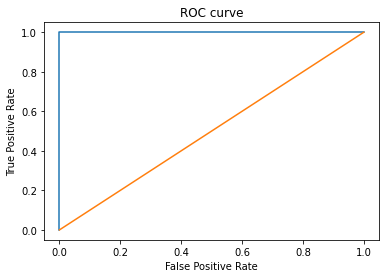

Test confusion matrix when i = 30:
[[172   7]
 [  6 100]]


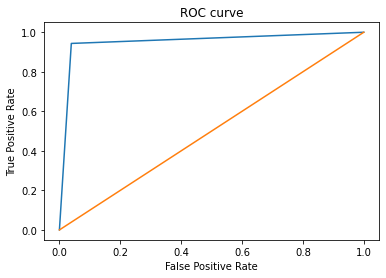

In [9]:
trainAccuracy = []
trainPrecision = []
trainRecall = []
trainFscore = []
trainAuc= []

testAccuracy = []
testPrecision = []
testRecall = []
testFscore = []
testAuc= []


### Train = Labled and Test = UnLabeled

#actual test and train will be used later after while loop

for i in range(1,31):
#     print(i)
    normalize = Normalizer()
    #create a dataframe for 0 and 1
    df0 = dfOriginal[dfOriginal['Diagnosis'] == 0]
    df1 = dfOriginal[dfOriginal['Diagnosis'] == 1]

    #create a train dataframe with random 80% of 0 and 1 and reamining 20% as test dataframe
    df0_train = df0.sample(frac=0.5, random_state=i)
    df1_train = df1.sample(frac=0.5, random_state=i)
    df_train = pd.concat([df0_train, df1_train], axis=0)

    df0_test = df0.drop(df0_train.index)
    df1_test = df1.drop(df1_train.index)
    df_test = pd.concat([df0_test, df1_test], axis=0)

    #xTain and yTrain
    xTrain = df_train.iloc[:,2:].reset_index()
    yTrain = df_train.iloc[:,1].reset_index()
    
    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)
    
    #normalize 
    val_train = normalize.fit_transform(xTrain)
    xTrainNormalized = pd.DataFrame(val_train)
    xTrainNormalized.columns = xTrain.columns

    #xTest and yTest
    xTest = df_test.iloc[:,2:].reset_index()
    yTest = df_test.iloc[:,1].reset_index()
    
    xTest.drop('index', inplace=True, axis=1)
    yTest.drop('index', inplace=True, axis=1)
    
    #normalize
    val_test = normalize.transform(xTest)
    xTestNormalized = pd.DataFrame(val_test)
    xTestNormalized.columns = xTest.columns
    
    #Fit the model train
    
    svmL1 = LinearSVC(penalty='l1', dual=False)
    svmL1 = GridSearchCV(estimator = svmL1, param_grid={'C': np.logspace(-6,12,24), 'tol':[0.0001,0.00001,0.000001] } , cv = 5)
    svmL1.fit(xTestNormalized, yTest['Diagnosis'])
    
    
    svmL1 = LinearSVC(penalty='l1', C = svmL1.best_params_['C'], dual=False)
    svmL1.fit(xTrainNormalized, yTrain['Diagnosis'])
#     print(len(xTestNormalized))
    while len(xTestNormalized) > 0:
            
            # Find the distance from unlabeled data points to the decision boundary
            y = svmL1.decision_function(xTestNormalized)
            w_normal = np.linalg.norm(svmL1.coef_)

            # Distance from point x to the decision boundary is y/||w||.
            dist = abs(y / w_normal)
            dist = dist.tolist()
                
            # Get the farthest point from the SVM decision boundary
            max_i = np.argmax(dist)
            max_row = [xTestNormalized.iloc[max_i ,:].values.tolist()]
            new_lab = pd.DataFrame(data = max_row, columns = xTestNormalized.columns)
            new_unlab_pred = pd.Series(svmL1.predict(new_lab))
     
            # Add the farthest point from the SVM boundary to the labeled data
            xTrainNormalized = pd.concat([xTrainNormalized , new_lab], ignore_index=True)
            

            yTrain.loc[len(yTrain)] = new_unlab_pred[0] #pd.concat([yTrain, new_unlab_pred],ignore_index=True)

            
            # Remove the point which is at maximum dist from SVm boundary
            dist.pop(max_i)
            xTestNormalized = xTestNormalized.drop([xTestNormalized.index[max_i]])

            # refit the SVC
            svmL1.fit(xTrainNormalized, yTrain['Diagnosis'])    
    
    
    df0 = dfOriginal[dfOriginal['Diagnosis'] == 0]
    df1 = dfOriginal[dfOriginal['Diagnosis'] == 1]

    #create a train dataframe with random 80% of 0 and 1 and reamining 20% as test dataframe
    df0_train = df0.sample(frac=0.5, random_state=i)
    df1_train = df1.sample(frac=0.5, random_state=i)
    df_train = pd.concat([df0_train, df1_train], axis=0)

    df0_test = df0.drop(df0_train.index)
    df1_test = df1.drop(df1_train.index)
    df_test = pd.concat([df0_test, df1_test], axis=0)

    #xTain and yTrain
    xTrain = df_train.iloc[:,2:].reset_index()
    yTrain = df_train.iloc[:,1].reset_index()
    
    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)
    
    #normalize 
    val_train = normalize.fit_transform(xTrain)
    xTrainNormalized = pd.DataFrame(val_train)
    xTrainNormalized.columns = xTrain.columns

    #xTest and yTest
    xTest = df_test.iloc[:,2:].reset_index()
    yTest = df_test.iloc[:,1].reset_index()
    
    xTest.drop('index', inplace=True, axis=1)
    yTest.drop('index', inplace=True, axis=1)
    
    #normalize
    val_test = normalize.transform(xTest)
    xTestNormalized = pd.DataFrame(val_test)
    xTestNormalized.columns = xTest.columns



    #Predict and calculate metrics train
    yPred = svmL1.predict(xTrainNormalized)
    trainPrecision.append(precision_score(yTrain, yPred))
    trainRecall.append(recall_score(yTrain, yPred))
    trainAccuracy.append(accuracy_score(yTrain, yPred)) 
    trainFscore.append(f1_score(yTrain, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTrain,yPred)
    trainAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Train confusion matrix when i = 30:")
        print(confusion_matrix(yTrain, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    
     #Fit the model test
#     svmL1 = LinearSVC(penalty='l1', dual=False)
#     svmL1 = GridSearchCV(estimator = svmL1, param_grid={'C': np.logspace(-6,12,24), 'tol':[0.0001,0.00001,0.000001] } , cv = 5)
#     svmL1.fit(xTestNormalized, yTest['Diagnosis'])
    
    #Predict and calculate metrics test
    yPred = svmL1.predict(xTestNormalized)
    testPrecision.append(precision_score(yTest, yPred))
    testRecall.append(recall_score(yTest, yPred))
    testAccuracy.append(accuracy_score(yTest, yPred)) 
    testFscore.append(f1_score(yTest, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTest,yPred)
    testAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Test confusion matrix when i = 30:")
        print(confusion_matrix(yTest, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    

In [10]:
    #print average metrics
print("========= TRAIN =========")
print("Average Train Accuracy: ", np.mean(trainAccuracy))
print("Average Train Precision: ", np.mean(trainPrecision))
print("Average Train Recall: ", np.mean(trainRecall))
print("Average Train Fscore: ", np.mean(trainFscore))
print("Average Train Auc: ", np.mean(trainAuc))
print()
print("========= TEST =========")
print("Average Test Accuracy: ", np.mean(testAccuracy))
print("Average Test Precision: ", np.mean(testPrecision))
print("Average Test Recall: ", np.mean(testRecall))
print("Average Test Fscore: ", np.mean(testFscore))
print("Average Test Auc: ", np.mean(testAuc))

========= TRAIN =========
Average Train Accuracy:  0.9874413145539906
Average Train Precision:  0.9901417522369462
Average Train Recall:  0.9761006289308178
Average Train Fscore:  0.9830326838948099
Average Train Auc:  0.9851476927425622

========= TEST =========
Average Test Accuracy:  0.9629239766081873
Average Test Precision:  0.959429006373713
Average Test Recall:  0.9408805031446541
Average Test Fscore:  0.9496813453878883
Average Test Auc:  0.9584290783879694


<h4>
iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

<h4>A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?<br><br>
B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.<br><br>
    C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

To make sure that algorith is not trapped in local minimun we can run it multiple times. max_iter parameter is used to restarts the algorithm multiple times

In [11]:
def calculateClusterDistance(trainX, Clustercenter, train_label ):
    #distance array
    dist_0 = np.array([])
    dist_1 = np.array([])
    
    #probability array
    proba_0= np.array([])
    proba_1= np.array([])
    
    for i in range(0, len(trainX)):
        dist_0 = np.append(dist_0 , np.linalg.norm(trainX.values[i] - Clustercenter[train_label[0]]))
        proba_0 = np.append(proba_0,np.linalg.norm(trainX.values[i] - Clustercenter[0]))
        dist_1 = np.append(dist_1,np.linalg.norm(trainX.values[i] - Clustercenter[train_label[1]]))
        proba_1 = np.append(proba_1,np.linalg.norm(trainX.values[i]- Clustercenter[1]))
        
    proba_0 = softmax(proba_0).astype(np.float64)
    proba_1 = softmax(proba_1).astype(np.float64)
    
    return [dist_0, dist_1], [proba_0, proba_1]


In [12]:
def findMajority(X, Y, label):
    #create a copy
    majority_lab = label.copy()
    map_lab_clus = np.ndarray((2,), dtype = 'int')
    
    for i in range(0, 2):
        idx, = np.where(label == i)
        sorts = np.sort(idx, axis = 0) 
        
        # 30 closest data points 
        best = sorts[:30]
        maj = Y.iloc[best].value_counts().index[0]
        majority_lab[idx] = maj
        map_lab_clus[maj] = i
        
    return map_lab_clus, majority_lab

Train confusion matrix when i = 30:
[[280   6]
 [ 40 130]]


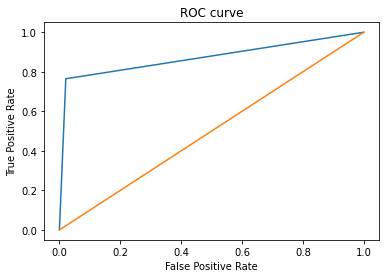

Test confusion matrix when i = 30:
[[70  1]
 [16 26]]


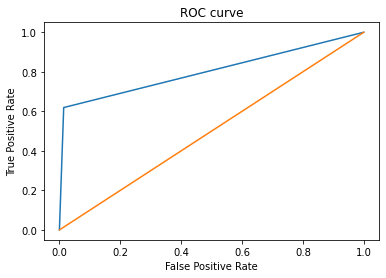

In [13]:
trainAccuracy = []
trainPrecision = []
trainRecall = []
trainFscore = []
trainAuc= []

testAccuracy = []
testPrecision = []
testRecall = []
testFscore = []
testAuc= []


for i in range(1,31):
    normalize = Normalizer()
    #create a dataframe for 0 and 1
    df0 = dfOriginal[dfOriginal['Diagnosis'] == 0]
    df1 = dfOriginal[dfOriginal['Diagnosis'] == 1]

    #create a train dataframe with random 80% of 0 and 1 and reamining 20% as test dataframe
    df0_train = df0.sample(frac=0.8, random_state=i)
    df1_train = df1.sample(frac=0.8, random_state=i)
    df_train = pd.concat([df0_train, df1_train], axis=0)

    df0_test = df0.drop(df0_train.index)
    df1_test = df1.drop(df1_train.index)
    df_test = pd.concat([df0_test, df1_test], axis=0)

    #xTain and yTrain
    xTrain = df_train.iloc[:,2:].reset_index()
    yTrain = df_train.iloc[:,1].reset_index()
    
    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)
    
    #normalize 
    val_train = normalize.fit_transform(xTrain)
    xTrainNormalized = pd.DataFrame(val_train)
    xTrainNormalized.columns = xTrain.columns

    #xTest and yTest
    xTest = df_test.iloc[:,2:].reset_index()
    yTest = df_test.iloc[:,1].reset_index()
    
    xTest.drop('index', inplace=True, axis=1)
    yTest.drop('index', inplace=True, axis=1)
    
    #normalize
    val_test = normalize.transform(xTest)
    xTestNormalized = pd.DataFrame(val_test)
    xTestNormalized.columns = xTest.columns
    
    #Fit the model train
    clusterModel = KMeans(init = 'random',n_clusters=2, n_init=10, max_iter = 400, random_state=i)
    clusterModel = clusterModel.fit(xTrainNormalized)
    
    #Predict and calculate metrics train
    xTrainPredict = clusterModel.predict(xTrainNormalized)
    distance, proba_train_y = calculateClusterDistance(xTrainNormalized, clusterModel.cluster_centers_, xTrainPredict)
    lab_clus, yPred = findMajority(xTrainNormalized, yTrain, xTrainPredict)
    
    trainPrecision.append(precision_score(yTrain, yPred))
    trainRecall.append(recall_score(yTrain, yPred))
    trainAccuracy.append(accuracy_score(yTrain, yPred)) 
    trainFscore.append(f1_score(yTrain, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTrain,yPred)
    trainAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Train confusion matrix when i = 30:")
        print(confusion_matrix(yTrain, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    

    
    #Predict and calculate metrics test
    xTestPredict = clusterModel.predict(xTestNormalized)
    distance, proba_test_y = calculateClusterDistance(xTestNormalized, clusterModel.cluster_centers_, xTestPredict)
    lab_clus, yPred = findMajority(xTestNormalized, yTest, xTestPredict)
    
    
    testPrecision.append(precision_score(yTest, yPred))
    testRecall.append(recall_score(yTest, yPred))
    testAccuracy.append(accuracy_score(yTest, yPred)) 
    testFscore.append(f1_score(yTest, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTest,yPred)
    testAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Test confusion matrix when i = 30:")
        print(confusion_matrix(yTest, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    
    
   

In [14]:
    #print average metrics
print("========= TRAIN =========")
print("Average Train Accuracy: ", np.mean(trainAccuracy))
print("Average Train Precision: ", np.mean(trainPrecision))
print("Average Train Recall: ", np.mean(trainRecall))
print("Average Train Fscore: ", np.mean(trainFscore))
print("Average Train Auc: ", np.mean(trainAuc))
print()
print("========= TEST =========")
print("Average Test Accuracy: ", np.mean(testAccuracy))
print("Average Test Precision: ", np.mean(testPrecision))
print("Average Test Recall: ", np.mean(testRecall))
print("Average Test Fscore: ", np.mean(testFscore))
print("Average Test Auc: ", np.mean(testAuc))

========= TRAIN =========
Average Train Accuracy:  0.8867690058479533
Average Train Precision:  0.9574498592331718
Average Train Recall:  0.728823529411765
Average Train Fscore:  0.8273401339461526
Average Train Auc:  0.8547381050322229

========= TEST =========
Average Test Accuracy:  0.8861356932153392
Average Test Precision:  0.9642553494714664
Average Test Recall:  0.720634920634921
Average Test Fscore:  0.823738449677463
Average Test Auc:  0.8523362396601832


<h4>iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

Train confusion matrix when i = 30:
[[281   5]
 [ 44 126]]


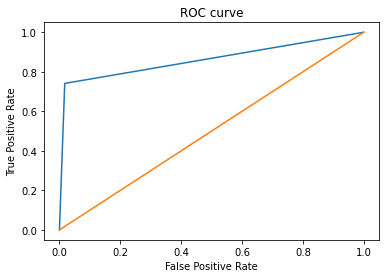

Test confusion matrix when i = 30:
[[69  2]
 [17 25]]


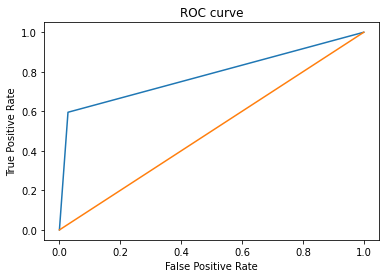

In [15]:
trainAccuracy = []
trainPrecision = []
trainRecall = []
trainFscore = []
trainAuc= []

testAccuracy = []
testPrecision = []
testRecall = []
testFscore = []
testAuc= []


for i in range(1,31):
    normalize = Normalizer()
    #create a dataframe for 0 and 1
    df0 = dfOriginal[dfOriginal['Diagnosis'] == 0]
    df1 = dfOriginal[dfOriginal['Diagnosis'] == 1]

    #create a train dataframe with random 80% of 0 and 1 and reamining 20% as test dataframe
    df0_train = df0.sample(frac=0.8, random_state=i)
    df1_train = df1.sample(frac=0.8, random_state=i)
    df_train = pd.concat([df0_train, df1_train], axis=0)

    df0_test = df0.drop(df0_train.index)
    df1_test = df1.drop(df1_train.index)
    df_test = pd.concat([df0_test, df1_test], axis=0)

    #xTain and yTrain
    xTrain = df_train.iloc[:,2:].reset_index()
    yTrain = df_train.iloc[:,1].reset_index()
    
    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)
    
    #normalize 
    val_train = normalize.fit_transform(xTrain)
    xTrainNormalized = pd.DataFrame(val_train)
    xTrainNormalized.columns = xTrain.columns

    #xTest and yTest
    xTest = df_test.iloc[:,2:].reset_index()
    yTest = df_test.iloc[:,1].reset_index()
    
    xTest.drop('index', inplace=True, axis=1)
    yTest.drop('index', inplace=True, axis=1)
    
    #normalize
    val_test = normalize.transform(xTest)
    xTestNormalized = pd.DataFrame(val_test)
    xTestNormalized.columns = xTest.columns
    
    #Fit the model train
    
    cluster = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity='rbf', eigen_tol = 1e-2, 
                                    eigen_solver = 'arpack', random_state = i)
    label = cluster.fit_predict(xTrainNormalized)
    clusterCenters = []
    for clus in [0,1]:
        clusterCenters.append(np.mean(xTrainNormalized[label == clus], axis = 0).tolist())
        
    #KNN
    knnClas = KNeighborsClassifier(n_neighbors=1)
    knnClas.fit(xTrainNormalized, label)
    
    #Predict and calculate metrics train
    train_label = knnClas.predict(xTrainNormalized)
    dist, prob_train = calculateClusterDistance(xTrainNormalized, clusterCenters, train_label )
    lab_clus, yPred = findMajority(xTrainNormalized, yTrain, train_label)
    
    trainPrecision.append(precision_score(yTrain, yPred))
    trainRecall.append(recall_score(yTrain, yPred))
    trainAccuracy.append(accuracy_score(yTrain, yPred)) 
    trainFscore.append(f1_score(yTrain, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTrain,yPred)
    trainAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Train confusion matrix when i = 30:")
        print(confusion_matrix(yTrain, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    

    
    #Predict and calculate metrics test
    xTestPredict = knnClas.predict(xTestNormalized)
    distance, proba_test_y = calculateClusterDistance(xTestNormalized, clusterModel.cluster_centers_, xTestPredict)
    lab_clus, yPred = findMajority(xTestNormalized, yTest, xTestPredict)
    
    
    testPrecision.append(precision_score(yTest, yPred))
    testRecall.append(recall_score(yTest, yPred))
    testAccuracy.append(accuracy_score(yTest, yPred)) 
    testFscore.append(f1_score(yTest, yPred))
    fpr_tr, tpr_tr, _ = roc_curve(yTest,yPred)
    testAuc.append(auc(fpr_tr, tpr_tr))
    if(i==30):
        print("Test confusion matrix when i = 30:")
        print(confusion_matrix(yTest, yPred))
        plt.plot(fpr_tr, tpr_tr)
        plt.plot([0,1],[0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.show()
    
    
   

In [16]:
    #print average metrics
print("========= TRAIN =========")
print("Average Train Accuracy: ", np.mean(trainAccuracy))
print("Average Train Precision: ", np.mean(trainPrecision))
print("Average Train Recall: ", np.mean(trainRecall))
print("Average Train Fscore: ", np.mean(trainFscore))
print("Average Train Auc: ", np.mean(trainAuc))
print()
print("========= TEST =========")
print("Average Test Accuracy: ", np.mean(testAccuracy))
print("Average Test Precision: ", np.mean(testPrecision))
print("Average Test Recall: ", np.mean(testRecall))
print("Average Test Fscore: ", np.mean(testFscore))
print("Average Test Auc: ", np.mean(testAuc))

========= TRAIN =========
Average Train Accuracy:  0.8817251461988305
Average Train Precision:  0.9572911394671054
Average Train Recall:  0.7147058823529411
Average Train Fscore:  0.8182513950296328
Average Train Auc:  0.8478541066776362

========= TEST =========
Average Test Accuracy:  0.8743362831858407
Average Test Precision:  0.9518499021182013
Average Test Recall:  0.6976190476190476
Average Test Fscore:  0.8035687499531861
Average Test Auc:  0.8382461435278336


<h4>v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

**Supervised Learning:**<br><br>
    ========= TRAIN =========<br>
Average Train Accuracy:  0.9821637426900585<br>
Average Train Precision:  0.9817950528486956<br>
Average Train Recall:  0.9701960784313725<br>
Average Train Fscore:  0.9759404342984136<br>
Average Train Auc:  0.979736733854381<br>
<br>
========= TEST =========<br>
Average Test Accuracy:  0.9613569321533922<br>
Average Test Precision:  0.9516295388327959<br>
Average Test Recall:  0.9452380952380951<br>
Average Test Fscore:  0.9478643482191895<br>
Average Test Auc:  0.958065057008719

**Semi-Supervised Learning** <br>

========= TRAIN =========<br>
Average Train Accuracy:  0.9876760563380282<br>
Average Train Precision:  0.9904418591202185<br>
Average Train Recall:  0.9764150943396229<br>
Average Train Fscore:  0.9833488160020138<br>
Average Train Auc:  0.9853985584057663<br>
<br>
========= TEST =========<br>
Average Test Accuracy:  0.9632748538011697<br>
Average Test Precision:  0.9606041417620798<br>
Average Test Recall:  0.9405660377358489<br>
Average Test Fscore:  0.9501094054997447<br>
Average Test Auc:  0.9586442851621516<br>

**Unsupervised Learning** <br>

========= TRAIN =========<br>
Average Train Accuracy:  0.8867690058479533<br>
Average Train Precision:  0.9574498592331718<br>
Average Train Recall:  0.728823529411765<br>
Average Train Fscore:  0.8273401339461526<br>
Average Train Auc:  0.8547381050322229<br>
<br>
========= TEST =========<br>
Average Test Accuracy:  0.8861356932153392<br>
Average Test Precision:  0.9642553494714664<br>
Average Test Recall:  0.720634920634921<br>
Average Test Fscore:  0.823738449677463<br>
Average Test Auc:  0.8523362396601832

**Spectral Clustering**<br>

========= TRAIN =========<br>
Average Train Accuracy:  0.8817251461988305<br>
Average Train Precision:  0.9572911394671054<br>
Average Train Recall:  0.7147058823529411<br>
Average Train Fscore:  0.8182513950296328<br>
Average Train Auc:  0.8478541066776362<br>
<br>
========= TEST =========<br>
Average Test Accuracy:  0.8743362831858407<br>
Average Test Precision:  0.9518499021182013<br>
Average Test Recall:  0.6976190476190476<br>
Average Test Fscore:  0.8035687499531861<br>
Average Test Auc:  0.8382461435278336<br>

Supervised and semi Supervised learning has very similar accuracy but unsupervised and spectral clusteral clustering has notable difference when compared to Supervised and semi Supervised learning

<h4>Active Learning Using Support Vector Machines

<h4>(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [17]:
bankData = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
bankData.columns=['variance','skewness','curtosis','entropy','class']
bankData

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<h4>(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

<h4>i. TrainaSVMwithapoolof10randomlyselecteddatapointsfromthetraining set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [18]:
acuu_df = pd.DataFrame()
for i in range (0,50):
    #Select random 900 rows as train and remaining as test
    
    trainDf = bankData.sample(900,random_state = i)
    testDf = bankData.drop(trainDf.index)

    #reset the index of train and test df
    trainDf.reset_index(inplace=True)
    testDf.reset_index(inplace=True)

    #select first 4 rows as xTrain and last row as yTrain
    xTrain = trainDf.iloc[:,1:5].reset_index()
    yTrain = trainDf.iloc[:,5].reset_index()

    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)

    #select first 4 rows as xTest and last row as yTest
    xTest = testDf.iloc[:,1:5].reset_index()
    yTest = testDf.iloc[:,5].reset_index()

    xTest.drop('index', inplace=True, axis=1)
    yTest.drop('index', inplace=True, axis=1)
    
    m = StratifiedKFold(n_splits=90)
    combinedDf = pd.DataFrame()
    accuracy = []
    for index_1, index_2 in m.split(xTrain, yTrain):
        
        xTrain10, yTrain10 = xTrain.iloc[index_2], yTrain.iloc[index_2]
        
        tempDf = pd.concat([xTrain10, yTrain10],axis=1)
        
        combinedDf = pd.concat([combinedDf, tempDf],axis=0)

        combinedX = combinedDf.drop('class',axis=1)
        combinedY = combinedDf['class']
        
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        
        model = GridSearchCV(LinearSVC(penalty='l1',loss='squared_hinge',dual=False), parameters,cv = 5)
        
        model.fit(combinedX, combinedY)
        predictedY = model.predict(xTest)
        
        accuracy.append(accuracy_score(yTest,predictedY))
        
    column_values = pd.Series(accuracy)
    acuu_df.insert(loc = i, column= i, value = column_values)


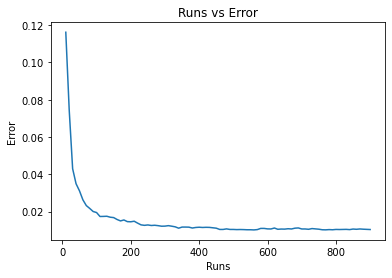

In [19]:
avg_value = pd.DataFrame(acuu_df.mean(axis=1))
avg_value[0] = avg_value[0].apply(lambda x: 1-x)
runs = [i*10 for i in range (1,91)]
runs = pd.DataFrame(runs)


#plot runs vs avg_value 
plt.plot(runs.iloc[:, 0],avg_value.iloc[:, 0])
plt.xlabel('Runs')
plt.ylabel('Error')
plt.title('Runs vs Error')
plt.show()

In [20]:
avg_value

,0
0,0.116186
1,0.074449
2,0.042966
3,0.034915
4,0.031102
...,...
85,0.010466
86,0.010636
87,0.010508
88,0.010424


<h4> ii TrainaSVMwithapoolof10randomlyselecteddatapointsfromthetraining set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [21]:
acuu_df1 = pd.DataFrame()
for k in range (0,50):
    
    accuracy = []
    #Select random 900 rows as train and remaining as test
    
    trainDf = bankData.sample(900,random_state = k)
    testDf = bankData.drop(trainDf.index)

    #reset the index of train and test df
    trainDf.reset_index(inplace=True)
    testDf.reset_index(inplace=True)

    #select first 4 rows as xTrain and last row as yTrain
    xTrain = trainDf.iloc[:,1:5].reset_index()
    yTrain = trainDf.iloc[:,5].reset_index()

    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)

    #select first 4 rows as xTest and last row as yTest
    xTest = testDf.iloc[:,1:5].reset_index()
    yTest = testDf.iloc[:,5].reset_index()

    xTest.drop('index', inplace=True, axis=1)
    yTest.drop('index', inplace=True, axis=1)
    
    
    combined_df=pd.DataFrame()

    #Select 10 random rows from trainDf and add to combinedDf
    
    tempDf = trainDf.sample(10,random_state = i)
    
    combined_df = pd.concat([combined_df, tempDf],axis=0)
    combined_df.drop('index', inplace=True, axis=1)
    combined_df.reset_index(inplace=True)
    combined_df.drop('index', inplace=True, axis=1)
#     print(combined_df)
    
    
    #Saperate combinedDf into xTrain and yTrain
    combinedX = combined_df.drop(['class'],axis=1)
    combinedY = combined_df['class']

    #Remove the selected rows from XTrain and YTrain
    xTrain = xTrain.drop(tempDf.index)
    yTrain = yTrain.drop(tempDf.index)
    trainDf = trainDf.drop(tempDf.index)
    
    #reset the index of combinedDf, xTrain and yTrain
    xTrain.reset_index(inplace=True)
    yTrain.reset_index(inplace=True)
    trainDf.reset_index(inplace=True)
    
    xTrain.drop('index', inplace=True, axis=1)
    yTrain.drop('index', inplace=True, axis=1)
    


    for i in range(1,90):

        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        
        model = GridSearchCV(LinearSVC(penalty = 'l1',loss = 'squared_hinge', dual = False), parameters,cv=5) 
               
        model.fit(combinedX,combinedY)
        
       
        leng = abs(model.decision_function(xTrain))
        distance_df =  pd.DataFrame(leng)

        distance_df = distance_df.sort_values(0)
        distance_df = distance_df.iloc[0:10,]
        distance_df_index = distance_df.index

        temp  =  trainDf.iloc[distance_df_index,:]
       
        xTrain= xTrain.drop(index = distance_df_index)
        xTrain.reset_index(inplace=True)
        xTrain.drop('index', inplace=True, axis=1)
        

        pred_y = model.predict(xTest)
        accuracy.append(accuracy_score(yTest,pred_y))
        
        combined_df = pd.concat([combined_df,temp],axis=0)
        combined_df.drop('index', inplace=True, axis=1)
        combined_df.drop('level_0', inplace=True, axis=1)
        
        
        combined_df.reset_index(inplace=True)
        combined_df.drop('index', inplace=True, axis=1)
        
        
        #Saperate combinedDf into xTrain and yTrain
        combinedX = combined_df.drop(['class'],axis=1)
        combinedY = combined_df['class']
        
    column_values = pd.Series(accuracy)
    acuu_df1.insert(loc=k, column=k, value=column_values)

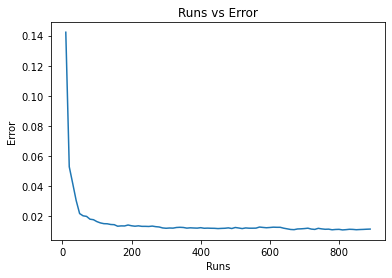

In [22]:
avg_value1 = pd.DataFrame(acuu_df1.mean(axis=1))
avg_value1[0] = avg_value1[0].apply(lambda x: 1-x)
runs1 = [i*10 for i in range (1,90)]
runs1 = pd.DataFrame(runs1)


#plot runs vs avg_value 
plt.plot(runs1.iloc[:, 0],avg_value1.iloc[:, 0])
plt.xlabel('Runs')
plt.ylabel('Error')
plt.title('Runs vs Error')
plt.show()

<h4>(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

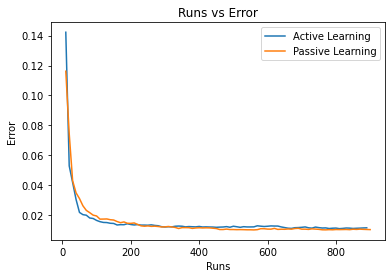

In [23]:
#plot combined graph of error vs runs for both the methods
plt.plot(runs1.iloc[:, 0],avg_value1.iloc[:, 0], label = 'Active Learning')
plt.plot(runs.iloc[:, 0],avg_value.iloc[:, 0], label = 'Passive Learning')
plt.xlabel('Runs')
plt.ylabel('Error')
plt.title('Runs vs Error')
plt.legend()
plt.show()
